# **Rodrigo_Mesquita_DR4_TP2**
## **Inteligência Artificial: Clusterização [24E2_4]**

## 1.Com um conjunto de dados de sua escolha, aplique a técnica de clusterização hierárquica e posteriormente represente o dendrograma. Em seguida, insira duas linhas no dendrograma e determine o número de clusters associados a cada linha.

In [132]:
import pandas as pd
import sklearn as sk
from scipy.cluster.hierarchy import dendrogram, ward, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import mglearn


In [133]:
df = pd.read_csv('/workspaces/Faculdade/Datasets/olympics_medals.csv')

In [134]:
df.head(5)

,countries,ioc_code,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total,winter_participations,winter_gold,winter_silver,winter_bronze,winter_total,total_participation,total_gold,total_silver,total_bronze,total_total
0,Afghanistan,(AFG),15,0,0,2,2,0,0,0,0,0,15,0,0,2,2
1,Algeria,(ALG),14,5,4,8,17,3,0,0,0,0,17,5,4,8,17
2,Argentina,(ARG),25,21,26,30,77,20,0,0,0,0,45,21,26,30,77
3,Armenia,(ARM),7,2,8,8,18,8,0,0,0,0,15,2,8,8,18
4,Australasia,(ANZ),2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [135]:
#df = df.sample(n=50, random_state=22)

In [136]:
X_feats= df[['total_gold','total_silver','total_bronze']].copy()
X_labels = df['countries ']

In [137]:
X_feats.columns

Index(['total_gold', 'total_silver', 'total_bronze'], dtype='object')

In [138]:
X_feats.dtypes

total_gold      object
total_silver     int64
total_bronze     int64
dtype: object

In [139]:
#Tive de remover as vírgulas dos separadores de milhares para poder converter as colunas para float
X_feats = X_feats.replace(',', '', regex=True).astype(float)

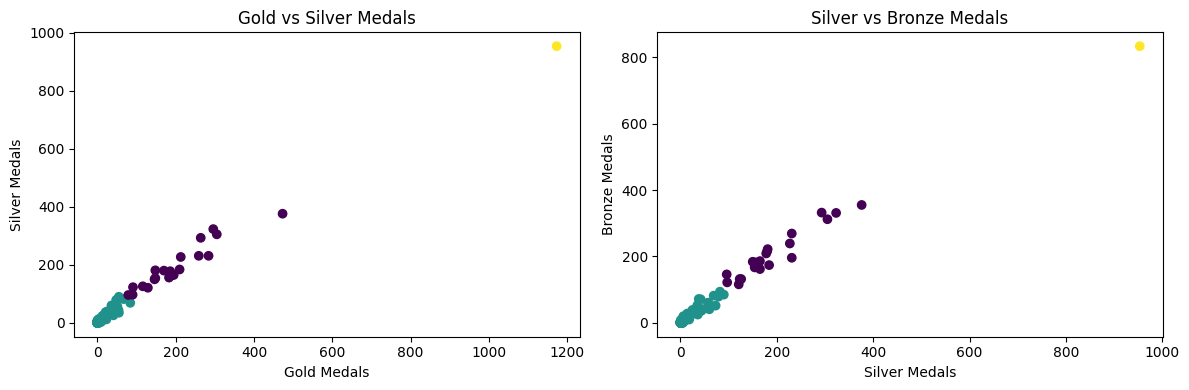

In [140]:
#Visualizando a distribuição das classsificações através de scatter plots
hierarc = AgglomerativeClustering(n_clusters=3)
preds = hierarc.fit_predict(X_feats)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Primeiro gráfico: Gold vs Silver
ax1.scatter(X_feats['total_gold'], X_feats['total_silver'], c=preds)
ax1.set_xlabel('Gold Medals')
ax1.set_ylabel('Silver Medals')
ax1.set_title('Gold vs Silver Medals')

# Segundo gráfico: Silver vs Bronze
ax2.scatter(X_feats['total_silver'], X_feats['total_bronze'], c=preds)
ax2.set_xlabel('Silver Medals')
ax2.set_ylabel('Bronze Medals')
ax2.set_title('Silver vs Bronze Medals')

plt.tight_layout()
plt.show()

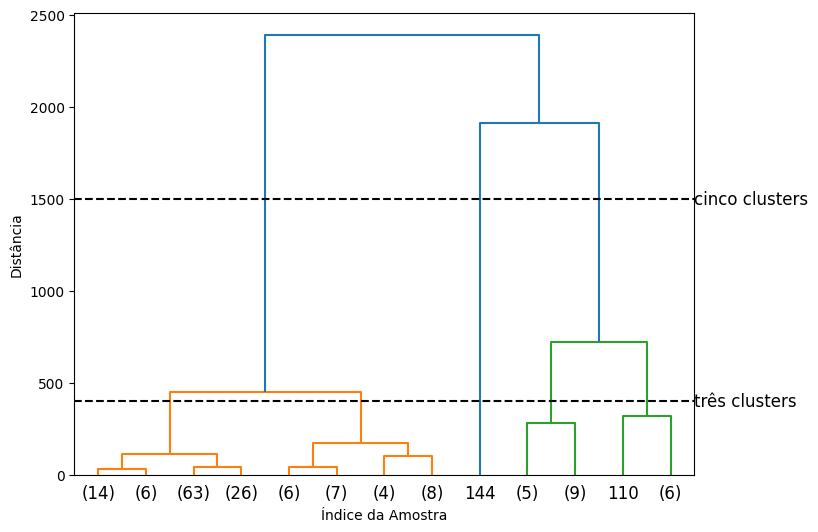

In [141]:
#Visualizando a aglomeração das classes através de Dendograma

linkage_array = ward(X_feats)

fig, ax = plt.subplots(figsize=(8, 6))
dendrogram(linkage_array, truncate_mode='level', p=3)

ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [1500, 1500], '--', c='k')
ax.plot(bounds, [400, 400], '--', c='k')

ax.text(bounds[1], 1500, 'cinco clusters', va='center', fontdict={'size': 12})
ax.text(bounds[1], 400, 'três clusters', va='center', fontdict={'size': 12})

plt.xlabel("Índice da Amostra")
plt.ylabel("Distância")
plt.show()

## 2.Com base no conjunto de dados dos pinguins, empregue os métodos Elbow e Silhouette para determinar o número ótimo de clusters (k) para o modelo KMeans. Represente graficamente os resultados e conduza uma análise para identificar o valor mais apropriado de k.

In [142]:
%pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.


In [143]:
from palmerpenguins import load_penguins
from sklearn.preprocessing   import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error
import numpy as np

In [144]:
df = load_penguins()
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


> #### Pré tratamento do conjunto de dados

In [145]:
df.dropna(inplace=True)

In [146]:
X_num = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']] #Variáveis independentes numéricas

In [147]:
elbow, silhouette = {},{}

# Normalizar os dados
scaler = StandardScaler()
X_num = scaler.fit_transform(X_num)

#Treinando o KMeans para 2 até 30 clusters
for k in range(2, 31, 1):
    model = KMeans(n_clusters= k, max_iter=5000,n_init=1, random_state=42).fit(X_num)
    preds = model.predict(X_num)
    elbow[k] = model.inertia_
    silhouette[k] = silhouette_score(X_num,preds)

In [148]:
#Gráfico Elbow
def elbow_silhouete(elbow,silhouette,titulo):
    maximo = max(elbow.values())
    for key in elbow:
        elbow[key] = float(elbow[key]) / maximo

    fig, ax1 = plt.subplots(figsize=(8, 4))
    ax1.plot(list(elbow.keys()), list(elbow.values()), label="Método Elbow", color='b')
    ax1.set_xlabel('Clusters', fontsize=12)
    ax1.set_ylabel('Inertia', fontsize=12, color='b')
    ax1.set_ylim(0, 1)
    ax1.tick_params('y', colors='b')
    ax1.legend(loc='upper right')

    #Ajustar o Xticks para que seja de 1 em 1
    ax1.set_xticks(list(elbow.keys()))
    ax1.set_xticklabels(list(elbow.keys()))
    #Adicionar grid vertical
    ax1.grid(visible=True, axis='x', linestyle='-', color='gray', alpha=0.5)

    # Gráfico Silhouete
    ax2 = ax1.twinx()
    ax2.plot(list(silhouette.keys()), list(silhouette.values()), label="Método Silhouette", color='r')
    ax2.set_ylabel('Silhouette Score', fontsize=12, color='r')
    ax2.set_ylim(0, 1)
    ax2.tick_params('y', colors='r')
    ax2.legend(loc='upper center')

    plt.title(titulo)
    plt.show()

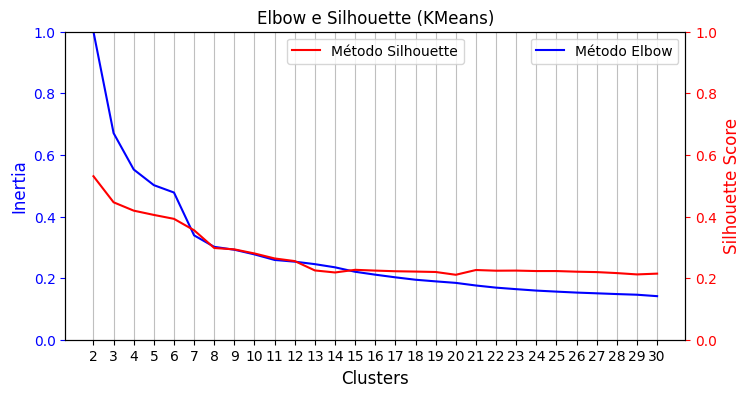

In [149]:
elbow_sem_pca, silhouette_sem_pca = elbow, silhouette
elbow_silhouete(elbow,silhouette,'Elbow e Silhouette (KMeans)')

> #### Plotei scatterplots combinando as variáveis para tentar visualizar porque a inertia é ruim para K=3, mesmo sabendo que é o número correto de clusters.

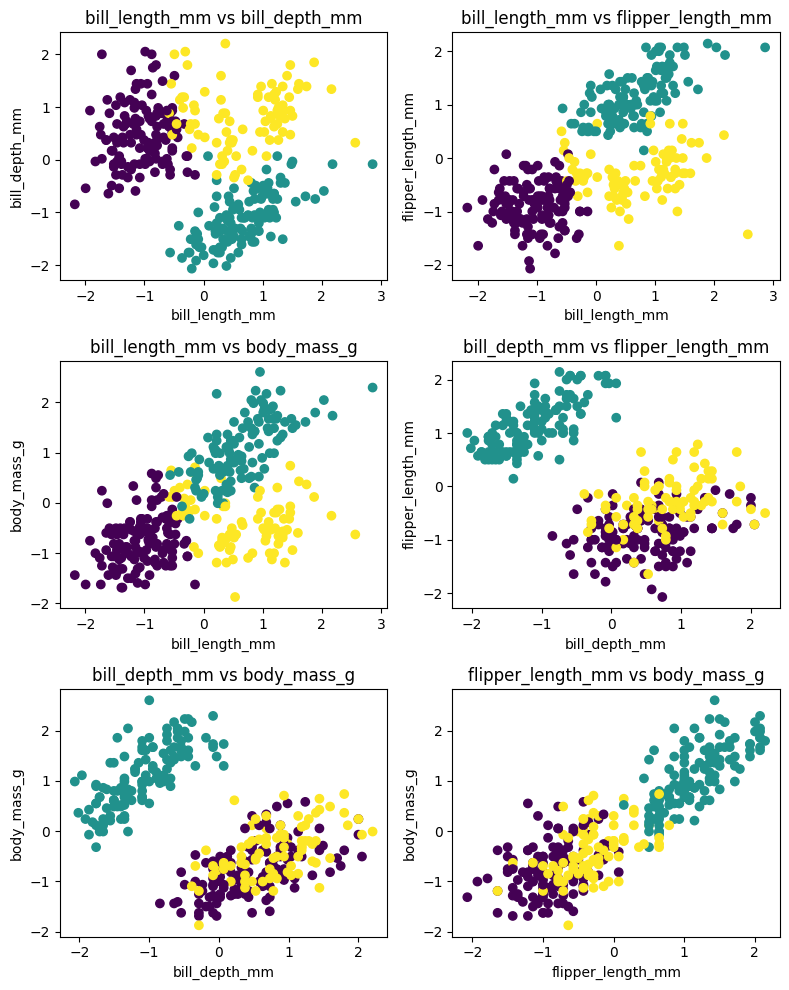

In [150]:
# Selecionar apenas as colunas numéricas
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values

# Normalizar os dados
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, max_iter=5000,n_init=1, random_state=42)
kmeans.fit(X_norm)
labels = kmeans.labels_

# Obter as colunas numéricas
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Criar a iteração
fig, axes = plt.subplots(3, 2, figsize=(8, 10))
axes = axes.ravel()

idx = ([0,1], [0,2], [0,3], [1,2], [1,3], [2,3])
for i, (x, y) in enumerate(idx):
    axes[i].scatter(X_norm[:, x], X_norm[:, y], c=labels, cmap='viridis')
    axes[i].set_xlabel(num_cols[x])
    axes[i].set_ylabel(num_cols[y])
    axes[i].set_title(f"{num_cols[x]} vs {num_cols[y]}")

plt.tight_layout()
plt.show()

## 3.Realize o mesmo teste feito na questão 2 utilizando K-Medoids.

In [151]:
%pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [152]:
from sklearn_extra.cluster import KMedoids

In [153]:
elbow, silhouette = {},{}
#Treinando o KMeans para 2 até 30 clusters
for k in range(2, 31, 1):
    model = KMedoids(n_clusters= k, max_iter=5000, random_state=42).fit(X_num)
    preds = model.predict(X_num)
    elbow[k] = model.inertia_
    silhouette[k] = silhouette_score(X_num,preds)

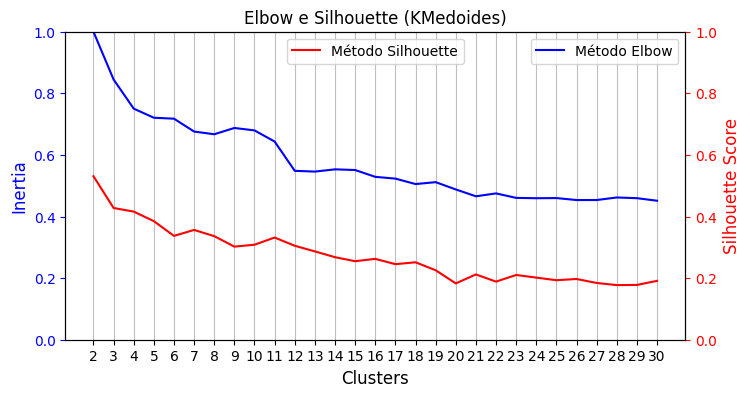

In [154]:
elbow_silhouete(elbow,silhouette,'Elbow e Silhouette (KMedoides)')

## 4.Empregando o conjunto de dados sobre pinguins, proceda à redução de dimensionalidade por meio do PCA e realize uma análise comparativa do desempenho com a aplicação do algoritmo KMeans. Avalie o número ótimo de características requeridas pelo PCA e pelo KMeans para alcançar o desempenho máximo.

In [156]:
%pip install rogeriopradoj-paretochart;

Note: you may need to restart the kernel to use updated packages.


In [157]:
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from paretochart.paretochart import pareto

/home/codespace/.python/current/lib/python3.10/site-packages/paretochart/paretochart.py:198: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(yt)


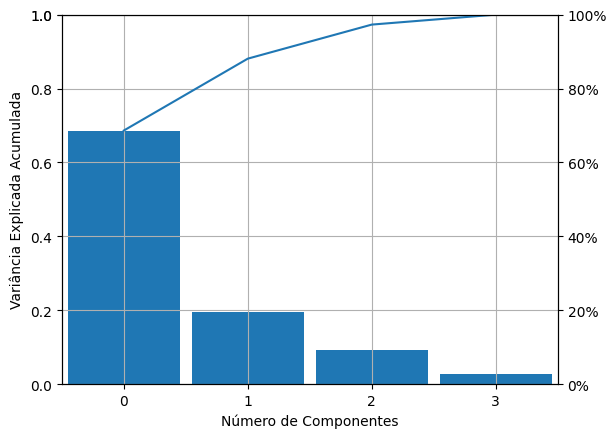

In [158]:
pca = PCA().fit(X_num)
fig, ax = plt.subplots()
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
pareto(pca.explained_variance_ratio_)
ax.grid()
plt.show()

In [159]:
#Executando novamente com o número de componentes escolhido
pca = PCA(n_components=2).fit(X_num)
X_num_pca = pca.transform(X_num)

In [160]:
#Treinando o KMeans para 2 até 30 clusters
elbow, silhouette = {},{}
for k in range(2, 31, 1):
    model = KMeans(n_clusters= k, max_iter=5000,n_init=1, random_state=42).fit(X_num_pca)
    preds = model.predict(X_num_pca)
    elbow[k] = model.inertia_
    silhouette[k] = silhouette_score(X_num_pca,preds)

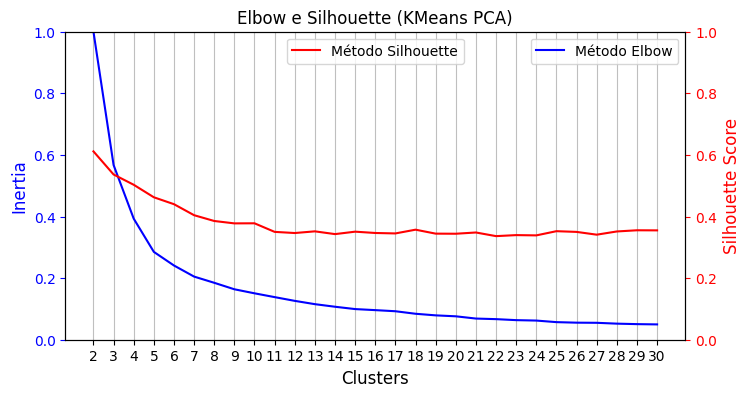

In [176]:
elbow_com_pca, silhouette_com_pca = elbow, silhouette
elbow_silhouete(elbow,silhouette,'Elbow e Silhouette (KMeans PCA)')

In [182]:
print("Comparando o valor de Inertia e Silhouette sem e com PCA para K=3")
print(f"Inertia: Original: {elbow_sem_pca[3]:.0%} | com PCA: {elbow_com_pca[3]:.0%}")
print(f"Silhouette: Original: {silhouette_sem_pca[3]:.0%} | com PCA: {silhouette_com_pca[3]:.0%}")

Comparando o valor de Inertia e Silhouette sem e com PCA para K=3
Inertia: Original: 67% | com PCA: 57%
Silhouette: Original: 45% | com PCA: 54%
